In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_excel("C:\\Users\\bramhad\\OneDrive - Konecranes Plc\\Desktop\\Data Science\ExcelR\\Assignments\\18_Forecasting\\CocaCola_Sales_Rawdata.xlsx")
df.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [3]:
df.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


<AxesSubplot:>

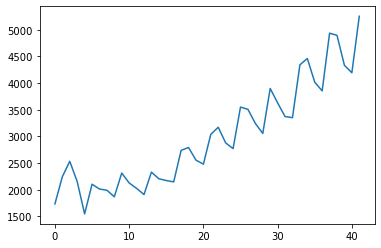

In [5]:
df.Sales.plot()

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

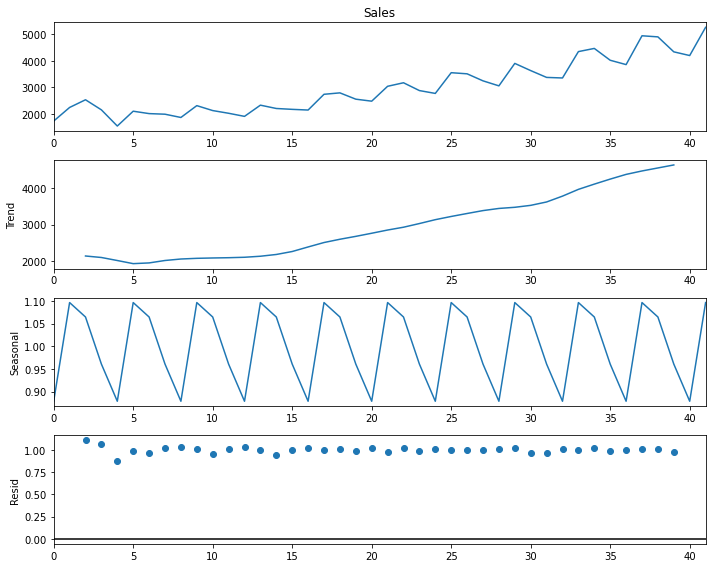

In [7]:
plt.rcParams['figure.figsize'] = 10,8
decomposition =seasonal_decompose(df.Sales, model='mul', period= 4) # additive seasonal index
decomposition.plot()
plt.show()

In [8]:
df.head()
Quat = pd.Series(df.Quarter)

In [9]:
quat=[]
for i in range (len(df)):
    val= Quat[i]
    quat.append(val[0:2])
quat = pd.DataFrame({"quat":quat})
quat = pd.get_dummies(quat)

In [10]:
df = pd.concat([df, quat], axis=1)
df.head()

,Quarter,Sales,quat_Q1,quat_Q2,quat_Q3,quat_Q4
0,Q1_86,1734.827000,1,0,0,0
1,Q2_86,2244.960999,0,1,0,0
2,Q3_86,2533.804993,0,0,1,0
3,Q4_86,2154.962997,0,0,0,1
4,Q1_87,1547.818996,1,0,0,0


In [11]:
t= np.arange(1,43)
df['t']=t
df['t_square']=np.square(df['t'])
df.head()

,Quarter,Sales,quat_Q1,quat_Q2,quat_Q3,quat_Q4,t,t_square
0,Q1_86,1734.827000,1,0,0,0,1,1
1,Q2_86,2244.960999,0,1,0,0,2,4
2,Q3_86,2533.804993,0,0,1,0,3,9
3,Q4_86,2154.962997,0,0,0,1,4,16
4,Q1_87,1547.818996,1,0,0,0,5,25


In [12]:
df.head()

,Quarter,Sales,quat_Q1,quat_Q2,quat_Q3,quat_Q4,t,t_square
0,Q1_86,1734.827000,1,0,0,0,1,1
1,Q2_86,2244.960999,0,1,0,0,2,4
2,Q3_86,2533.804993,0,0,1,0,3,9
3,Q4_86,2154.962997,0,0,0,1,4,16
4,Q1_87,1547.818996,1,0,0,0,5,25


In [13]:
df["log_Sales"]=np.log(df['Sales'])
df.head()

,Quarter,Sales,quat_Q1,quat_Q2,quat_Q3,quat_Q4,t,t_square,log_Sales
0,Q1_86,1734.827000,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,1,0,0,0,5,25,7.344602


In [14]:
# Train test Split
train = df.iloc[0:36]
test = df.iloc[36:]

In [15]:
train.tail()

,Quarter,Sales,quat_Q1,quat_Q2,quat_Q3,quat_Q4,t,t_square,log_Sales
31,Q4_93,3373.0,0,0,0,1,32,1024,8.123558
32,Q1_94,3352.0,1,0,0,0,33,1089,8.117312
33,Q2_94,4342.0,0,1,0,0,34,1156,8.376090
34,Q3_94,4461.0,0,0,1,0,35,1225,8.403128
35,Q4_94,4017.0,0,0,0,1,36,1296,8.298291


In [16]:
test

,Quarter,Sales,quat_Q1,quat_Q2,quat_Q3,quat_Q4,t,t_square,log_Sales
36,Q1_95,3854.0,1,0,0,0,37,1369,8.256867
37,Q2_95,4936.0,0,1,0,0,38,1444,8.504311
38,Q3_95,4895.0,0,0,1,0,39,1521,8.495970
39,Q4_95,4333.0,0,0,0,1,40,1600,8.374015
40,Q1_96,4194.0,1,0,0,0,41,1681,8.341410
41,Q2_96,5253.0,0,1,0,0,42,1764,8.566555


In [17]:
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error

In [18]:
#linear model
linear_model= smf.ols('Sales~t',data=train).fit()
pred1= linear_model.predict(test)
rsme1= np.sqrt(mean_squared_error(test.Sales, pred1))
rsme1

667.4256979280374

In [19]:
#quadratic model
quad_model=smf.ols('Sales~t+t_square',data=train).fit()
pred2 =  quad_model.predict(test)
rsme2= np.sqrt(mean_squared_error(test.Sales, pred2))
rsme2

485.1406702070385

In [20]:
#exponential model
expo_model=smf.ols('log_Sales~t',data=train).fit()
pred3= expo_model.predict(test)
pred3= np.exp(pred3)
rsme3= np.sqrt(mean_squared_error(test.Sales, pred3))
rsme3

526.7672615478397

In [21]:
#additive seasonality
add_model= smf.ols('Sales~ quat_Q1+quat_Q2+quat_Q3+quat_Q4',data=train).fit()
pred4 = add_model.predict(test)
rsme4= np.sqrt(mean_squared_error(test.Sales, pred4))
rsme4

1895.5593132150468

In [22]:
#additive seasonality with linear trend
adlin_model= smf.ols('Sales~t+quat_Q1+quat_Q2+quat_Q3+quat_Q4',data=train).fit()
pred5 = adlin_model.predict(test)
rsme5= np.sqrt(mean_squared_error(test.Sales, pred5))
rsme5

555.3404286757365

In [23]:
#multiplicative seasonality with linear trend
mul_lin=smf.ols('log_Sales~t+quat_Q1+quat_Q2+quat_Q3+quat_Q4',data=train).fit()
pred6= mul_lin.predict(test)
pred6= np.exp(pred6)
rsme6= np.sqrt(mean_squared_error(test.Sales, pred6))
rsme6

323.21275367142977

In [24]:
#multiplicative seasonality with quadratic trend
mul_quad=smf.ols('log_Sales~t+t_square+quat_Q1+quat_Q2+quat_Q3+quat_Q4',data=train).fit()
pred7= mul_quad.predict(test)
pred7= np.exp(pred7)
rsme7= np.sqrt(mean_squared_error(test.Sales, pred7))
rsme7

602.5095425118006

In [25]:
#multiplicative seasonality
mulsea=smf.ols('log_Sales~quat_Q1+quat_Q2+quat_Q3+quat_Q4',data=train).fit()
pred8= mulsea.predict(test)
pred8= np.exp(pred5)
rsme8= np.sqrt(mean_squared_error(test.Sales, pred5))
rsme8

C:\Users\bramhad\AppData\Local\Continnum\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


555.3404286757365

In [26]:
rsme= pd.DataFrame({"Model":
                   ["linear_model", "quad_model","expo_model", "add_model","adlin_model","mul_lin", "mul_quad","mulsea"],
                   "RSME":
                    [rsme1,rsme2, rsme3, rsme4, rsme5, rsme6, rsme7, rsme8 ]})

In [35]:
rsme

,Model,RSME
0,linear_model,667.425698
1,quad_model,485.140670
2,expo_model,526.767262
3,add_model,1895.559313
4,adlin_model,555.340429
5,mul_lin,323.212754
6,mul_quad,602.509543
7,mulsea,555.340429


### So as per the all model values of RSME , multiplicative seasonality with linear trend model has the lowest value so it can be selected.